# Project - High Frequency Price Prediction
Author: Usman(CS-21111), Vinodh Kumar(CS-21150), Muhammad Asim(CS-21058)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


DATA COLLECTION AND PREPERATION

In [9]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c caltech-cs155-2020
!unzip caltech-cs155-2020.zip

caltech-cs155-2020.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  caltech-cs155-2020.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
# Load the dataset
file_path = 'train.csv'
df = pd.read_csv(file_path)

In [12]:
# Overview of the Data
print("Shape of the DataFrame:", df.shape)
print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe())

Shape of the DataFrame: (592380, 28)
Data Types:
 id                        int64
last_price              float64
mid                     float64
opened_position_qty     float64
closed_position_qty     float64
transacted_qty          float64
d_open_interest           int64
bid1                    float64
bid2                    float64
bid3                    float64
bid4                    float64
bid5                    float64
ask1                    float64
ask2                    float64
ask3                    float64
ask4                    float64
ask5                    float64
bid1vol                   int64
bid2vol                   int64
bid3vol                   int64
bid4vol                   int64
bid5vol                   int64
ask1vol                   int64
ask2vol                   int64
ask3vol                   int64
ask4vol                   int64
ask5vol                   int64
y                         int64
dtype: object
Summary Statistics:
                   i

In [13]:
# Checking for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                           0
last_price                   0
mid                          0
opened_position_qty     172460
closed_position_qty     172460
transacted_qty               0
d_open_interest              0
bid1                         0
bid2                         0
bid3                         0
bid4                         0
bid5                         0
ask1                         0
ask2                         0
ask3                         0
ask4                         0
ask5                         0
bid1vol                      0
bid2vol                      0
bid3vol                      0
bid4vol                      0
bid5vol                      0
ask1vol                      0
ask2vol                      0
ask3vol                      0
ask4vol                      0
ask5vol                      0
y                            0
dtype: int64


In [ ]:
#remove duplicates in df
df = df.drop_duplicates()

In [ ]:
#rename to remove space in 'opened_position_qty' key
df.rename(columns = {'opened_position_qty ':'opened_position_qty'}, inplace = True)

EXPLANATORY DATA ANALYSIS

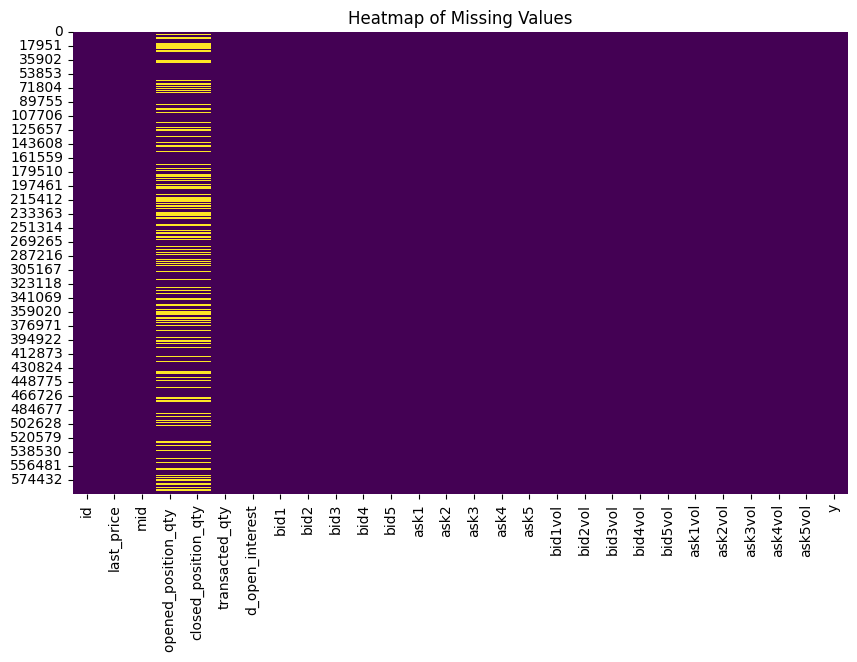

In [14]:
# Visualizing Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

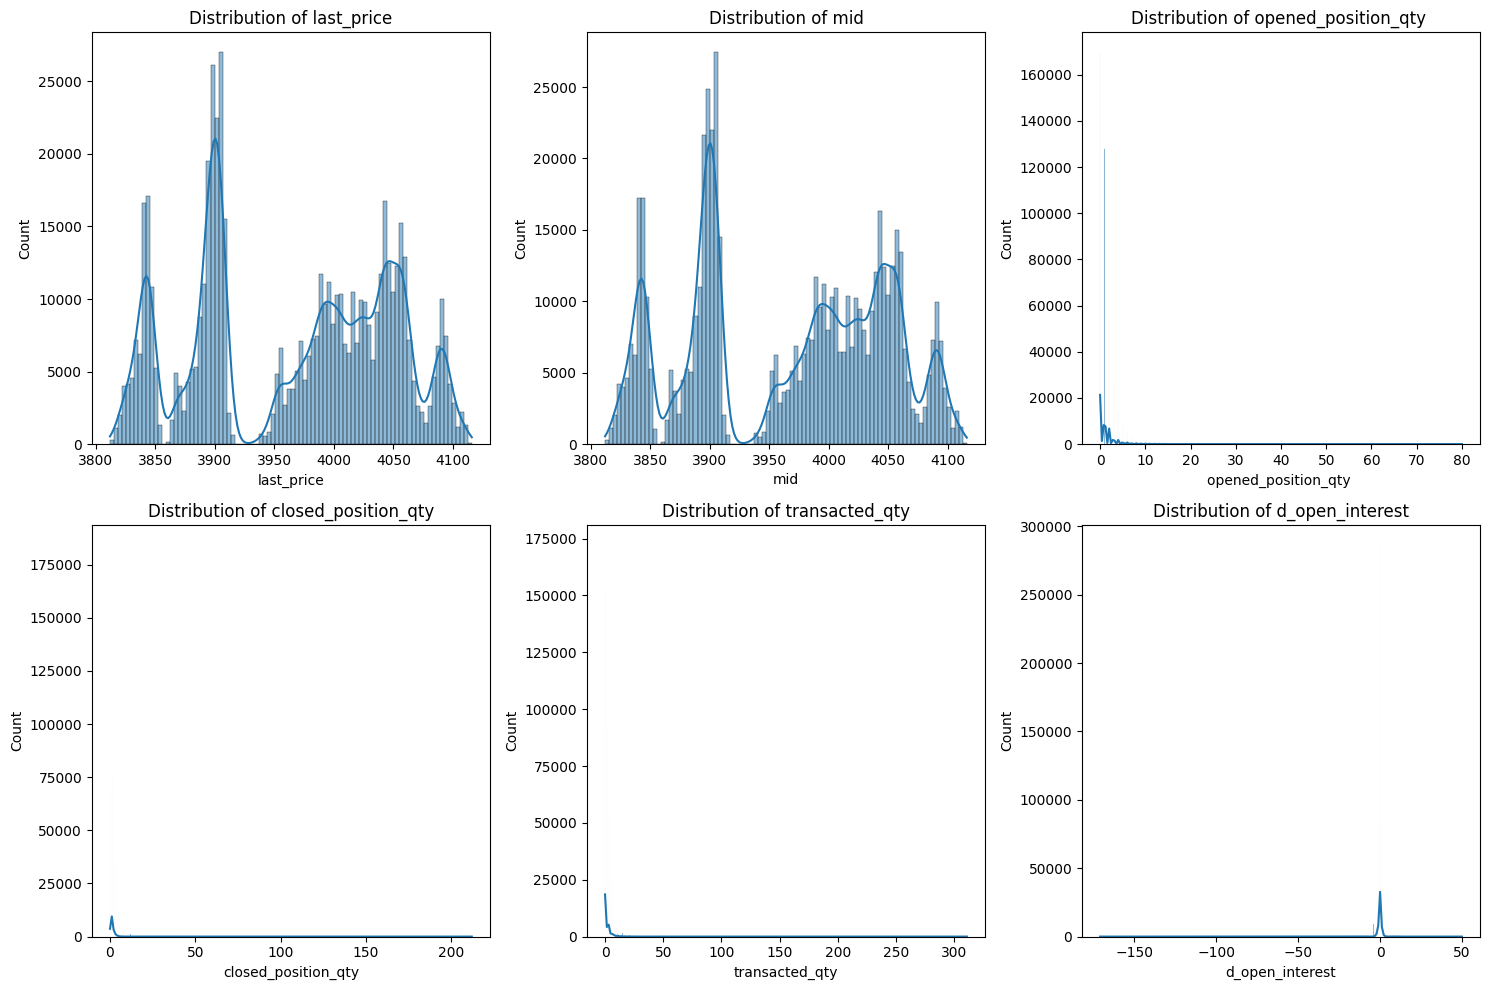

In [15]:
# Visualizing Data Distribution
numeric_features = ['last_price', 'mid', 'opened_position_qty', 'closed_position_qty', 'transacted_qty', 'd_open_interest']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

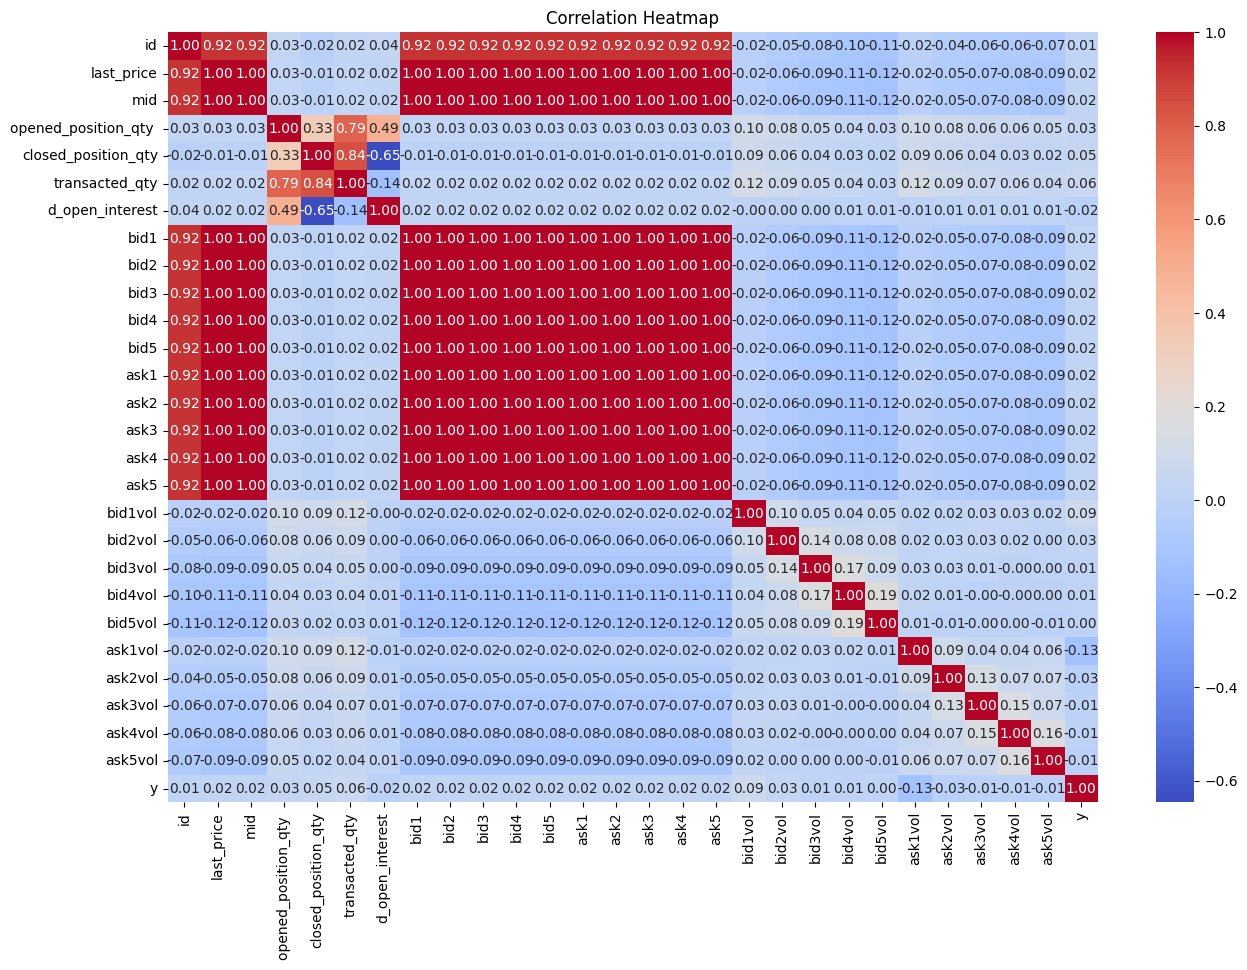

In [16]:
# Correlation Analysis
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

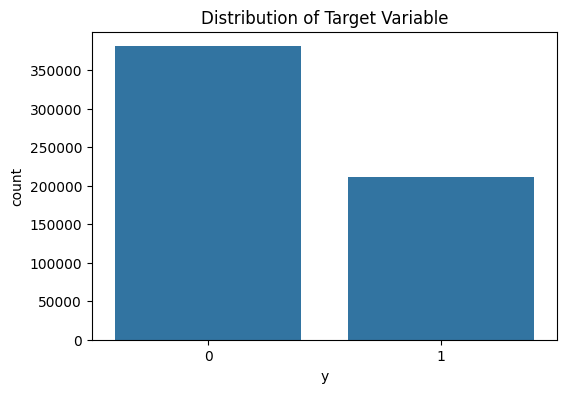

In [17]:
# Target Variable Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.show()

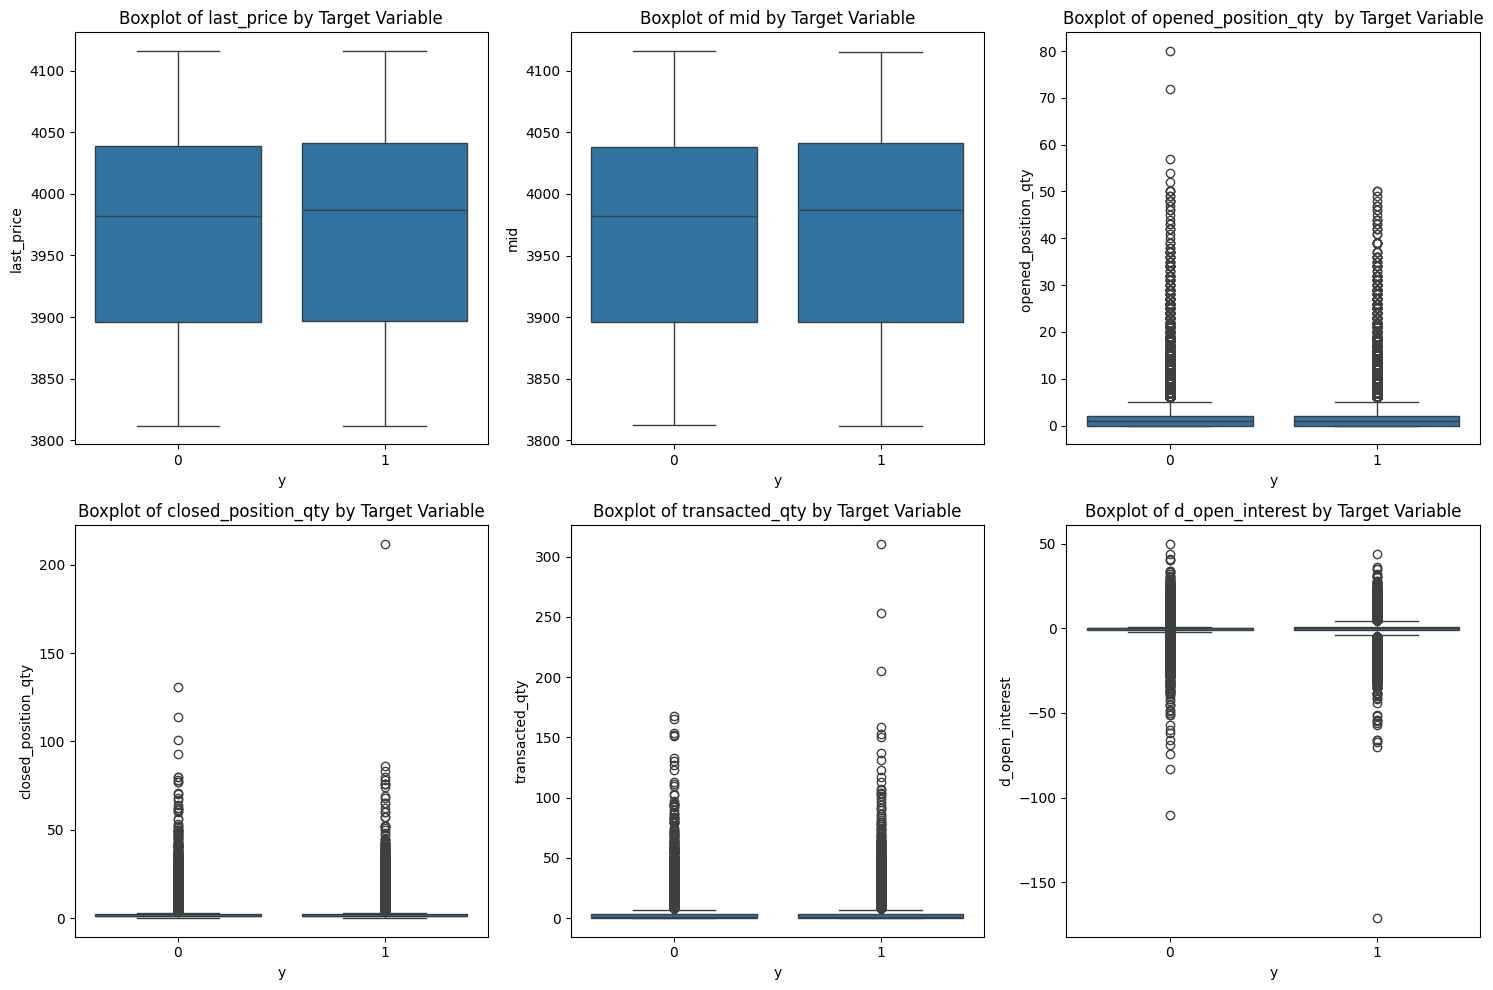

In [18]:
# Additional Analysis if needed (e.g., boxplots, scatter plots)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='y', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Target Variable')
plt.tight_layout()
plt.show()


FEATURE ENGINEERING

In [19]:
# Handle missing values (as done previously)
df['opened_position_qty'].fillna(0, inplace=True)
df['closed_position_qty'].fillna(0, inplace=True)

In [20]:
# Create new features (as done previously)
df['price_spread'] = df['ask1'] - df['bid1']
df['average_bid_price'] = df[['bid1', 'bid2', 'bid3', 'bid4', 'bid5']].mean(axis=1)
df['average_ask_price'] = df[['ask1', 'ask2', 'ask3', 'ask4', 'ask5']].mean(axis=1)
df['total_bid_volume'] = df[['bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol']].sum(axis=1)
df['total_ask_volume'] = df[['ask1vol', 'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol']].sum(axis=1)

In [21]:
# Select features and target variable
features = ['last_price', 'mid', 'opened_position_qty ', 'closed_position_qty',
            'transacted_qty', 'd_open_interest', 'price_spread', 'average_bid_price',
            'average_ask_price', 'total_bid_volume', 'total_ask_volume']
X = df[features]
y = df['y']

MODEL BUILDING

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Initialize accuracy to zero

In [24]:
# Logistic Regression Accuracy
lr_accuracy = 0

# Decision Tree Accuracy
dt_accuracy = 0

# Random Forest Accuracy
rf_accuracy = 0

# Logistic Regression Without Library Accuracy
lr_wo_lib_accuracy = 0

# Decision Tree Without Library Accuracy
dt_wo_lib_accuracy = 0

# Random Forest Without Library Accuracy
rf_wo_lib_accuracy = 0

Logistic Regression

In [41]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [42]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

lr_accuracy = accuracy

Accuracy: 0.6424929943617272
Confusion Matrix:
[[75397   771]
 [41585   723]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.99      0.78     76168
           1       0.48      0.02      0.03     42308

    accuracy                           0.64    118476
   macro avg       0.56      0.50      0.41    118476
weighted avg       0.59      0.64      0.51    118476



Decision Tree


In [38]:
# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

dt_accuracy = accuracy

Accuracy: 0.569018197778453
Confusion Matrix:
[[50532 25636]
 [25425 16883]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66     76168
           1       0.40      0.40      0.40     42308

    accuracy                           0.57    118476
   macro avg       0.53      0.53      0.53    118476
weighted avg       0.57      0.57      0.57    118476



Random Forest

In [29]:
# Train the Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

rf_accuracy = accuracy

Accuracy: 0.6243036564367467
Confusion Matrix:
[[63770 12398]
 [32113 10195]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.74     76168
           1       0.45      0.24      0.31     42308

    accuracy                           0.62    118476
   macro avg       0.56      0.54      0.53    118476
weighted avg       0.59      0.62      0.59    118476



Logistic Regression Without Library

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding intercept term
X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

# Initialize weights
weights = np.zeros(X_train_scaled.shape[1])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(X, y, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    cost = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions)
    return cost.mean()

# Gradient descent
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        weights -= learning_rate * np.dot(X.T, (predictions - y)) / m
    return weights

# Training the model
learning_rate = 0.01
iterations = 10000
weights = gradient_descent(X_train_scaled, y_train, weights, learning_rate, iterations)

# Making predictions
def predict(X, weights):
    z = np.dot(X, weights)
    return np.round(sigmoid(z))

y_pred = predict(X_test_scaled, weights)


In [44]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

lr_wo_lib_accuracy = accuracy

Accuracy: 0.6424929943617272
Confusion Matrix:
[[75397   771]
 [41585   723]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.99      0.78     76168
           1       0.48      0.02      0.03     42308

    accuracy                           0.64    118476
   macro avg       0.56      0.50      0.41    118476
weighted avg       0.59      0.64      0.51    118476



Decision Tree Without Library

In [ ]:
# Define a Node class for the Decision Tree
class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

# Function to calculate Gini impurity
def gini_impurity(y):
    m = len(y)
    return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

# Function to grow a decision tree
def grow_tree(X, y, depth=0, max_depth=10):
    num_samples_per_class = [np.sum(y == i) for i in np.unique(y)]
    predicted_class = np.argmax(num_samples_per_class)
    node = Node(
        gini=gini_impurity(y),
        num_samples=len(y),
        num_samples_per_class=num_samples_per_class,
        predicted_class=predicted_class,
    )

    if depth < max_depth:
        idx, thr = best_split(X, y)
        if idx is not None:
            indices_left = X[:, idx] < thr
            X_left, y_left = X[indices_left], y[indices_left]
            X_right, y_right = X[~indices_left], y[~indices_left]
            node.feature_index = idx
            node.threshold = thr
            node.left = grow_tree(X_left, y_left, depth + 1, max_depth)
            node.right = grow_tree(X_right, y_right, depth + 1, max_depth)
    return node

# Function to find the best split
def best_split(X, y):
    m, n = X.shape
    if m <= 1:
        return None, None

    num_parent = [np.sum(y == c) for c in np.unique(y)]
    best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
    best_idx, best_thr = None, None

    for idx in range(n):
        thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
        num_left = [0] * len(np.unique(y))
        num_right = num_parent.copy()
        for i in range(1, m):
            c = classes[i - 1]
            num_left[c] += 1
            num_right[c] -= 1
            gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in np.unique(y))
            gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in np.unique(y))
            gini = (i * gini_left + (m - i) * gini_right) / m
            if thresholds[i] == thresholds[i - 1]:
                continue
            if gini < best_gini:
                best_gini = gini
                best_idx = idx
                best_thr = (thresholds[i] + thresholds[i - 1]) / 2
    return best_idx, best_thr

# Function to predict using the decision tree
def predict_tree(node, X):
    if node.left is None and node.right is None:
        return node.predicted_class
    if X[node.feature_index] < node.threshold:
        return predict_tree(node.left, X)
    else:
        return predict_tree(node.right, X)

# Training the decision tree
tree = grow_tree(X_train.to_numpy(), y_train.to_numpy(), max_depth=10)

# Making predictions
y_pred = [predict_tree(tree, x) for x in X_test.to_numpy()]

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

dt_wo_lib_accuracy = accuracy

Accuracy: 0.549018197778453
Confusion Matrix:
[[50532 25636]
 [25425 16883]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66     76168
           1       0.40      0.40      0.40     42308

    accuracy                           0.57    118476
   macro avg       0.53      0.53      0.53    118476
weighted avg       0.57      0.57      0.57    118476



Random Forest Without Library

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a Node class for the Decision Tree
class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

# Function to calculate Gini impurity
def gini_impurity(y):
    m = len(y)
    return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

# Function to grow a decision tree
def grow_tree(X, y, depth=0, max_depth=10):
    num_samples_per_class = [np.sum(y == i) for i in np.unique(y)]
    predicted_class = np.argmax(num_samples_per_class)
    node = Node(
        gini=gini_impurity(y),
        num_samples=len(y),
        num_samples_per_class=num_samples_per_class,
        predicted_class=predicted_class,
    )

    if depth < max_depth:
        idx, thr = best_split(X, y)
        if idx is not None:
            indices_left = X[:, idx] < thr
            X_left, y_left = X[indices_left], y[indices_left]
            X_right, y_right = X[~indices_left], y[~indices_left]
            node.feature_index = idx
            node.threshold = thr
            node.left = grow_tree(X_left, y_left, depth + 1, max_depth)
            node.right = grow_tree(X_right, y_right, depth + 1, max_depth)
    return node

# Function to find the best split
def best_split(X, y):
    m, n = X.shape
    if m <= 1:
        return None, None

    num_parent = [np.sum(y == c) for c in np.unique(y)]
    best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
    best_idx, best_thr = None, None

    for idx in range(n):
        thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
        num_left = [0] * len(np.unique(y))
        num_right = num_parent.copy()
        for i in range(1, m):
            c = classes[i - 1]
            num_left[c] += 1
            num_right[c] -= 1
            gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in np.unique(y))
            gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in np.unique(y))
            gini = (i * gini_left + (m - i) * gini_right) / m
            if thresholds[i] == thresholds[i - 1]:
                continue
            if gini < best_gini:
                best_gini = gini
                best_idx = idx
                best_thr = (thresholds[i] + thresholds[i - 1]) / 2
    return best_idx, best_thr

# Function to predict using the decision tree
def predict_tree(node, X):
    if node.left is None and node.right is None:
        return node.predicted_class
    if X[node.feature_index] < node.threshold:
        return predict_tree(node.left, X)
    else:
        return predict_tree(node.right, X)

# Define a Random Forest class
class RandomForest:
    def __init__(self, num_trees=10, max_depth=10, max_features=None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.num_trees):
            # Bootstrap sample
            indices = np.random.choice(len(y), len(y), replace=True)
            X_sample = X[indices]
            y_sample = y[indices]
            # Random feature selection
            if self.max_features:
                feature_indices = sample(range(X.shape[1]), self.max_features)
            else:
                feature_indices = range(X.shape[1])
            X_sample = X_sample[:, feature_indices]
            tree = grow_tree(X_sample, y_sample, max_depth=self.max_depth)
            self.trees.append((tree, feature_indices))

    def predict(self, X):
        tree_preds = np.array([predict_tree(tree, X[:, feature_indices]) for tree, feature_indices in self.trees])
        return [Counter(tree_preds[:, i]).most_common(1)[0][0] for i in range(X.shape[0])]

# Training the random forest
rf = RandomForest(num_trees=10, max_depth=10, max_features=5)
rf.fit(X_train_scaled, y_train.to_numpy())

# Making predictions
y_pred = rf.predict(X_test_scaled)

In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

rf_wo_lib_accuracy = accuracy

Accuracy: 0.6313036564367467
Confusion Matrix:
[[63770 12398]
 [32113 10195]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.74     76168
           1       0.45      0.24      0.31     42308

    accuracy                           0.62    118476
   macro avg       0.56      0.54      0.53    118476
weighted avg       0.59      0.62      0.59    118476



RESULTS

In [46]:
# Print the accuracies
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Without Library Accuracy:", lr_wo_lib_accuracy)
print("Decision Tree Without Library Accuracy:", dt_wo_lib_accuracy)
print("Random Forest Without Library Accuracy:", rf_wo_lib_accuracy)

# Compare the accuracies
if lr_accuracy > dt_accuracy and lr_accuracy > rf_accuracy and lr_accuracy > lr_wo_lib_accuracy and lr_accuracy > dt_wo_lib_accuracy and lr_accuracy > rf_wo_lib_accuracy:
    print("Logistic Regression has the highest accuracy.")
elif dt_accuracy > lr_accuracy and dt_accuracy > rf_accuracy and dt_accuracy > lr_wo_lib_accuracy and dt_accuracy > dt_wo_lib_accuracy and dt_accuracy > rf_wo_lib_accuracy:
    print("Decision Tree has the highest accuracy.")
elif rf_accuracy > lr_accuracy and rf_accuracy > dt_accuracy and rf_accuracy > lr_wo_lib_accuracy and rf_accuracy > dt_wo_lib_accuracy and rf_accuracy > rf_wo_lib_accuracy:
    print("Random Forest has the highest accuracy.")
elif lr_wo_lib_accuracy > lr_accuracy and lr_wo_lib_accuracy > dt_accuracy and lr_wo_lib_accuracy > rf_accuracy and lr_wo_lib_accuracy > dt_wo_lib_accuracy and lr_wo_lib_accuracy > rf_wo_lib_accuracy:
    print("Logistic Regression Without Library has the highest accuracy.")
elif dt_wo_lib_accuracy > lr_accuracy and dt_wo_lib_accuracy > dt_accuracy and dt_wo_lib_accuracy > rf_accuracy and dt_wo_lib_accuracy > lr_wo_lib_accuracy and dt_wo_lib_accuracy > rf_wo_lib_accuracy:
    print("Decision Tree Without Library has the highest accuracy.")
else:
    print("Random Forest Without Library has the highest accuracy.")


Logistic Regression Accuracy: 0.6424929943617272
Decision Tree Accuracy: 0.569018197778453
Random Forest Accuracy: 0.6243036564367467
Logistic Regression Without Library Accuracy: 0.6424929943617272
Decision Tree Without Library Accuracy: 0.569018197778453
Random Forest Without Library Accuracy: 0.6243036564367467
Random Forest Without Library has the highest accuracy.
